In [2]:
# from chembl_webresource_client.new_client import new_client
import pandas as pd
# from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, Crippen, rdMolDescriptors
from pathlib import Path
import sys

In [3]:
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

from chembl_download import extract_to_csv
from csv2parquet_converter import csv_to_parquet

# Pobieranie danych

In [ ]:
extract_to_csv()

In [ ]:
csv_to_parquet()

# EDA

In [2]:
df = pd.read_parquet("chembl_activity_subset_03.parquet")

In [3]:
df.standard_value = pd.to_numeric(df.standard_value, errors='coerce')
df = df.dropna(subset=['standard_value'])
print(df.count())

activity_id               2313433
assay_chembl_id           2313433
doc_id                    2313433
record_id                 2313433
molregno                  2313433
molecule_chembl_id        2313433
target_chembl_id          2313433
standard_relation         2313433
standard_value            2313433
standard_units            2312970
standard_flag             2313433
standard_type             2313433
potential_duplicate       2313433
pchembl_value             2252906
bao_endpoint              2313433
uo_units                  2311556
qudt_units                2311468
toid                           32
upper_value                 13441
standard_upper_value            0
src_id                    2313433
type                      2313433
relation                  2313433
value                     2313433
units                     2140690
text_value                      0
standard_text_value             0
confidence_score          2313433
assay_type_description    2313433
canonical_smil

In [4]:
df = df[df.potential_duplicate != 1]
print(df.count())

activity_id               2055328
assay_chembl_id           2055328
doc_id                    2055328
record_id                 2055328
molregno                  2055328
molecule_chembl_id        2055328
target_chembl_id          2055328
standard_relation         2055328
standard_value            2055328
standard_units            2054865
standard_flag             2055328
standard_type             2055328
potential_duplicate       2055328
pchembl_value             2001619
bao_endpoint              2055328
uo_units                  2053504
qudt_units                2053416
toid                           32
upper_value                 12270
standard_upper_value            0
src_id                    2055328
type                      2055328
relation                  2055328
value                     2055328
units                     1894886
text_value                      0
standard_text_value             0
confidence_score          2055328
assay_type_description    2055328
canonical_smil

In [5]:
df.pchembl_value = pd.to_numeric(df.pchembl_value, errors='coerce')
df = df.dropna(subset=['pchembl_value'])
print(df.count())

activity_id               2001619
assay_chembl_id           2001619
doc_id                    2001619
record_id                 2001619
molregno                  2001619
molecule_chembl_id        2001619
target_chembl_id          2001619
standard_relation         2001619
standard_value            2001619
standard_units            2001619
standard_flag             2001619
standard_type             2001619
potential_duplicate       2001619
pchembl_value             2001619
bao_endpoint              2001619
uo_units                  2001619
qudt_units                2001619
toid                           32
upper_value                 12107
standard_upper_value            0
src_id                    2001619
type                      2001619
relation                  2001619
value                     2001619
units                     1847400
text_value                      0
standard_text_value             0
confidence_score          2001619
assay_type_description    2001619
canonical_smil

In [6]:
display(df.head())

,activity_id,assay_chembl_id,doc_id,record_id,molregno,molecule_chembl_id,target_chembl_id,standard_relation,standard_value,standard_units,...,hba,psa,heavy_atoms,qed_weighted,num_ro5_violations,max_phase,first_approval,target_name,organism,target_type
0,32233,44517,5951,251326,179188,CHEMBL111217,CHEMBL235,=,63.0,nM,...,2.0,46.53,31.0,0.36,1.0,NaN,NaN,Peroxisome proliferator-activated receptor gamma,Homo sapiens,SINGLE PROTEIN
1,32234,44520,5951,251326,179188,CHEMBL111217,CHEMBL235,=,6.4,nM,...,2.0,46.53,31.0,0.36,1.0,NaN,NaN,Peroxisome proliferator-activated receptor gamma,Homo sapiens,SINGLE PROTEIN
2,32249,106820,6217,35595,33632,CHEMBL415341,CHEMBL259,=,9.0,nM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Melanocortin receptor 4,Homo sapiens,SINGLE PROTEIN
3,32251,106820,6217,35591,33415,CHEMBL437822,CHEMBL259,=,7.0,nM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Melanocortin receptor 4,Homo sapiens,SINGLE PROTEIN
4,32252,106815,6217,35591,33415,CHEMBL437822,CHEMBL3795,=,1330.0,nM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Melanocyte-stimulating hormone receptor,Homo sapiens,SINGLE PROTEIN


In [7]:
display(df.standard_value.describe())

count    2.001619e+06
mean     4.968718e+03
std      1.734358e+05
min      3.500000e-04
25%      1.700000e+01
50%      1.700000e+02
75%      1.760000e+03
max      1.400000e+08
Name: standard_value, dtype: float64

In [8]:
df.assay_type_description = df.assay_type_description.astype('category')
df = df.dropna(subset=['assay_type_description'])
print(df.count())

activity_id               2001619
assay_chembl_id           2001619
doc_id                    2001619
record_id                 2001619
molregno                  2001619
molecule_chembl_id        2001619
target_chembl_id          2001619
standard_relation         2001619
standard_value            2001619
standard_units            2001619
standard_flag             2001619
standard_type             2001619
potential_duplicate       2001619
pchembl_value             2001619
bao_endpoint              2001619
uo_units                  2001619
qudt_units                2001619
toid                           32
upper_value                 12107
standard_upper_value            0
src_id                    2001619
type                      2001619
relation                  2001619
value                     2001619
units                     1847400
text_value                      0
standard_text_value             0
confidence_score          2001619
assay_type_description    2001619
canonical_smil

In [9]:
display(df.head())

,activity_id,assay_chembl_id,doc_id,record_id,molregno,molecule_chembl_id,target_chembl_id,standard_relation,standard_value,standard_units,...,hba,psa,heavy_atoms,qed_weighted,num_ro5_violations,max_phase,first_approval,target_name,organism,target_type
0,32233,44517,5951,251326,179188,CHEMBL111217,CHEMBL235,=,63.0,nM,...,2.0,46.53,31.0,0.36,1.0,NaN,NaN,Peroxisome proliferator-activated receptor gamma,Homo sapiens,SINGLE PROTEIN
1,32234,44520,5951,251326,179188,CHEMBL111217,CHEMBL235,=,6.4,nM,...,2.0,46.53,31.0,0.36,1.0,NaN,NaN,Peroxisome proliferator-activated receptor gamma,Homo sapiens,SINGLE PROTEIN
2,32249,106820,6217,35595,33632,CHEMBL415341,CHEMBL259,=,9.0,nM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Melanocortin receptor 4,Homo sapiens,SINGLE PROTEIN
3,32251,106820,6217,35591,33415,CHEMBL437822,CHEMBL259,=,7.0,nM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Melanocortin receptor 4,Homo sapiens,SINGLE PROTEIN
4,32252,106815,6217,35591,33415,CHEMBL437822,CHEMBL3795,=,1330.0,nM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Melanocyte-stimulating hormone receptor,Homo sapiens,SINGLE PROTEIN


In [10]:
df.max_phase = df.max_phase.fillna(0).astype(float).astype(int)
df.max_phase = df.max_phase.astype('category')

In [11]:
display(df.describe())

,activity_id,assay_chembl_id,doc_id,record_id,molregno,standard_value,standard_flag,potential_duplicate,pchembl_value,toid,...,confidence_score,mw_freebase,alogp,hbd,hba,psa,heavy_atoms,qed_weighted,num_ro5_violations,first_approval
count,2.001619e+06,2.001619e+06,2.001619e+06,2.001619e+06,2.001619e+06,2.001619e+06,2001619.0,2001619.0,2.001619e+06,32.000000,...,2.001619e+06,2.001619e+06,1.948826e+06,1.948826e+06,1.948826e+06,1.948826e+06,1.948826e+06,1.948826e+06,1.948826e+06,41514.000000
mean,1.497317e+07,1.435402e+06,8.473626e+04,2.426875e+06,1.700491e+06,4.968718e+03,1.0,0.0,6.792754e+00,16930.093750,...,8.664957e+00,4.670835e+02,3.755063e+00,1.860730e+00,5.670250e+00,8.942462e+01,3.092879e+01,5.099174e-01,5.187015e-01,1993.930939
std,9.908735e+06,8.664800e+05,4.192438e+04,1.472246e+06,1.062457e+06,1.734358e+05,0.0,0.0,1.356872e+00,4125.460837,...,5.307040e-01,2.787502e+02,1.754796e+00,1.525269e+00,2.334548e+00,4.273497e+01,8.489215e+00,2.072043e-01,7.649409e-01,19.828996
min,3.186400e+04,1.700000e+01,2.000000e+00,1.000000e+00,1.000000e+01,3.500000e-04,1.0,0.0,8.500000e-01,14221.000000,...,7.000000e+00,1.900000e+01,-1.292000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-02,0.000000e+00,1934.000000
25%,3.334468e+06,6.380010e+05,5.152300e+04,9.194000e+05,5.607990e+05,1.700000e+01,1.0,0.0,5.750000e+00,14228.750000,...,8.000000e+00,3.614200e+02,2.730000e+00,1.000000e+00,4.000000e+00,6.245000e+01,2.500000e+01,3.600000e-01,0.000000e+00,1981.000000
50%,1.686892e+07,1.536899e+06,9.497200e+04,2.577660e+06,1.982188e+06,1.700000e+02,1.0,0.0,6.770000e+00,14236.500000,...,9.000000e+00,4.321000e+02,3.770000e+00,2.000000e+00,5.000000e+00,8.532000e+01,3.000000e+01,5.100000e-01,0.000000e+00,1998.000000
75%,2.491387e+07,2.249504e+06,1.236890e+05,3.870940e+06,2.551094e+06,1.760000e+03,1.0,0.0,7.770000e+00,20404.250000,...,9.000000e+00,5.055600e+02,4.820000e+00,2.000000e+00,7.000000e+00,1.090700e+02,3.500000e+01,6.700000e-01,1.000000e+00,2011.000000
max,2.905410e+07,2.596842e+06,1.359250e+05,4.647731e+06,3.283447e+06,1.400000e+08,1.0,0.0,1.246000e+01,26563.000000,...,9.000000e+00,1.018853e+04,1.898000e+01,2.500000e+01,3.200000e+01,5.802200e+02,7.900000e+01,9.500000e-01,4.000000e+00,2024.000000


In [12]:
df.dropna(subset=['mw_freebase', 'alogp', 'psa', 'qed_weighted', 'num_ro5_violations', 'hba', 'hbd', 'heavy_atoms'], inplace=True)

display(df.describe())

,activity_id,assay_chembl_id,doc_id,record_id,molregno,standard_value,standard_flag,potential_duplicate,pchembl_value,toid,...,confidence_score,mw_freebase,alogp,hbd,hba,psa,heavy_atoms,qed_weighted,num_ro5_violations,first_approval
count,1.948826e+06,1.948826e+06,1.948826e+06,1.948826e+06,1.948826e+06,1.948826e+06,1948826.0,1948826.0,1.948826e+06,29.000000,...,1.948826e+06,1.948826e+06,1.948826e+06,1.948826e+06,1.948826e+06,1.948826e+06,1.948826e+06,1.948826e+06,1.948826e+06,40606.000000
mean,1.498838e+07,1.436627e+06,8.475917e+04,2.428652e+06,1.698806e+06,5.024785e+03,1.0,0.0,6.781065e+00,16996.172414,...,8.662826e+00,4.367172e+02,3.755063e+00,1.860730e+00,5.670250e+00,8.942462e+01,3.092879e+01,5.099174e-01,5.187015e-01,1993.957937
std,9.922250e+06,8.678756e+05,4.192526e+04,1.473708e+06,1.065218e+06,1.757611e+05,0.0,0.0,1.350509e+00,4229.229929,...,5.308203e-01,1.194959e+02,1.754796e+00,1.525269e+00,2.334548e+00,4.273497e+01,8.489215e+00,2.072043e-01,7.649409e-01,19.836779
min,3.186400e+04,1.700000e+01,2.000000e+00,2.000000e+00,1.000000e+01,3.500000e-04,1.0,0.0,8.500000e-01,14221.000000,...,7.000000e+00,1.900000e+01,-1.292000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-02,0.000000e+00,1934.000000
25%,3.354285e+06,6.401640e+05,5.166700e+04,9.223410e+05,5.585660e+05,1.800000e+01,1.0,0.0,5.750000e+00,14228.000000,...,8.000000e+00,3.595000e+02,2.730000e+00,1.000000e+00,4.000000e+00,6.245000e+01,2.500000e+01,3.600000e-01,0.000000e+00,1981.000000
50%,1.686759e+07,1.536442e+06,9.494700e+04,2.576386e+06,1.981490e+06,1.720000e+02,1.0,0.0,6.760000e+00,14237.000000,...,9.000000e+00,4.294700e+02,3.770000e+00,2.000000e+00,5.000000e+00,8.532000e+01,3.000000e+01,5.100000e-01,0.000000e+00,1998.000000
75%,2.496842e+07,2.262276e+06,1.239370e+05,3.877418e+06,2.555103e+06,1.800000e+03,1.0,0.0,7.750000e+00,20404.000000,...,9.000000e+00,5.000600e+02,4.820000e+00,2.000000e+00,7.000000e+00,1.090700e+02,3.500000e+01,6.700000e-01,1.000000e+00,2011.000000
max,2.905410e+07,2.596842e+06,1.359250e+05,4.647731e+06,3.283447e+06,1.400000e+08,1.0,0.0,1.246000e+01,26563.000000,...,9.000000e+00,9.999700e+02,1.898000e+01,2.500000e+01,3.200000e+01,5.802200e+02,7.900000e+01,9.500000e-01,4.000000e+00,2024.000000


In [13]:
df = df.dropna(subset=["canonical_smiles"])
print(df.count())

activity_id               1948826
assay_chembl_id           1948826
doc_id                    1948826
record_id                 1948826
molregno                  1948826
molecule_chembl_id        1948826
target_chembl_id          1948826
standard_relation         1948826
standard_value            1948826
standard_units            1948826
standard_flag             1948826
standard_type             1948826
potential_duplicate       1948826
pchembl_value             1948826
bao_endpoint              1948826
uo_units                  1948826
qudt_units                1948826
toid                           29
upper_value                 10962
standard_upper_value            0
src_id                    1948826
type                      1948826
relation                  1948826
value                     1948826
units                     1800542
text_value                      0
standard_text_value             0
confidence_score          1948826
assay_type_description    1948826
canonical_smil

In [14]:
key = ['molecule_chembl_id', 'assay_chembl_id', 'target_chembl_id', 'standard_type', 'standard_units', 'standard_value', 'canonical_smiles']

mask_dups = df.duplicated(subset=key, keep=False)

duplicates = df.loc[mask_dups].sort_values(key)
display(duplicates)

,activity_id,assay_chembl_id,doc_id,record_id,molregno,molecule_chembl_id,target_chembl_id,standard_relation,standard_value,standard_units,...,hba,psa,heavy_atoms,qed_weighted,num_ro5_violations,max_phase,first_approval,target_name,organism,target_type
259085,549153,202113,13483,187955,164957,CHEMBL101863,CHEMBL3815,=,2500.00,nM,...,2.0,23.47,22.0,0.93,0.0,0,NaN,Squalene synthase,Rattus norvegicus,SINGLE PROTEIN
259086,549154,202113,13483,187954,164957,CHEMBL101863,CHEMBL3815,=,2500.00,nM,...,2.0,23.47,22.0,0.93,0.0,0,NaN,Squalene synthase,Rattus norvegicus,SINGLE PROTEIN
1822944,632596,157784,6622,6233,6132,CHEMBL10241,CHEMBL1995,=,50.12,nM,...,5.0,45.65,21.0,0.91,0.0,0,NaN,Prostacyclin receptor,Homo sapiens,SINGLE PROTEIN
1825811,664127,157784,6622,6210,6132,CHEMBL10241,CHEMBL1995,=,50.12,nM,...,5.0,45.65,21.0,0.91,0.0,0,NaN,Prostacyclin receptor,Homo sapiens,SINGLE PROTEIN
241266,382567,155036,5147,190737,167578,CHEMBL102784,CHEMBL254,=,39.00,nM,...,4.0,65.63,40.0,0.17,2.0,0,NaN,"3',5'-cyclic-AMP phosphodiesterase 4A",Homo sapiens,SINGLE PROTEIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873275,1260445,43688,12479,184554,162881,CHEMBL98777,CHEMBL3891,=,89.00,nM,...,4.0,96.53,32.0,0.50,0.0,0,NaN,Calpain-1 catalytic subunit,Homo sapiens,SINGLE PROTEIN
1672942,28877969,2596112,135614,4614225,11501,CHEMBL99,CHEMBL3310,=,12.00,nM,...,4.0,69.64,22.0,0.28,0.0,1,NaN,Histone deacetylase 11,Homo sapiens,SINGLE PROTEIN
1672985,28878101,2596112,135614,4614225,11501,CHEMBL99,CHEMBL3310,=,12.00,nM,...,4.0,69.64,22.0,0.28,0.0,1,NaN,Histone deacetylase 11,Homo sapiens,SINGLE PROTEIN
67565,12179404,884038,66879,1759176,162859,CHEMBL99384,CHEMBL274,=,1000.00,nM,...,2.0,25.78,18.0,0.55,0.0,0,NaN,C-C chemokine receptor type 5,Homo sapiens,SINGLE PROTEIN


In [15]:
df = df.drop_duplicates(subset=key, keep="first")
print(df.count())

activity_id               1941528
assay_chembl_id           1941528
doc_id                    1941528
record_id                 1941528
molregno                  1941528
molecule_chembl_id        1941528
target_chembl_id          1941528
standard_relation         1941528
standard_value            1941528
standard_units            1941528
standard_flag             1941528
standard_type             1941528
potential_duplicate       1941528
pchembl_value             1941528
bao_endpoint              1941528
uo_units                  1941528
qudt_units                1941528
toid                           29
upper_value                 10958
standard_upper_value            0
src_id                    1941528
type                      1941528
relation                  1941528
value                     1941528
units                     1794362
text_value                      0
standard_text_value             0
confidence_score          1941528
assay_type_description    1941528
canonical_smil

In [16]:

mols = df['canonical_smiles'].map(Chem.MolFromSmiles)

df["MolWt"]          = [Descriptors.MolWt(m) if m else np.nan for m in mols]
df["LogP"]           = [Crippen.MolLogP(m) if m else np.nan for m in mols]
df["TPSA"]           = [rdMolDescriptors.CalcTPSA(m) if m else np.nan for m in mols]
df["RotatableBonds"] = [Lipinski.NumRotatableBonds(m) if m else np.nan for m in mols]
df["AromaticRings"]  = [rdMolDescriptors.CalcNumAromaticRings(m) if m else np.nan for m in mols]
df["FractionCSP3"]   = [rdMolDescriptors.CalcFractionCSP3(m) if m else np.nan for m in mols]

# PREZENTACJA DANYCH

In [17]:
n = len(df)
bins = 20
top_n = 10

In [18]:
def print_histogram(name, s):
    missing = int(s.isna().sum())
    distinct = int(s.nunique(dropna=True))

    print("\n" + "="*60)
    print(f"{name} (dtype: {s.dtype})")
    print(f"Missing:  {missing} ({missing/n*100:.2f}%)")
    print(f"Distinct: {distinct} ({distinct/n*100:.2f}%)")

    if pd.api.types.is_numeric_dtype(s):
        x = pd.to_numeric(s, errors="coerce")
        x = x.replace([np.inf, -np.inf], np.nan).dropna()

        if x.empty:
            print("No finite numeric values -> skipping histogram")
            return

        print(f"Min {x.min():.4g}")
        print(f"Max {x.max():.4g}")

        plt.figure(figsize=(7, 3))
        plt.hist(x, bins=bins)
        plt.title(f"Histogram: {name}")
        plt.xlabel(name)
        plt.ylabel("count")
        plt.tight_layout()
        plt.show()

    else:
        vc = s.astype("string").value_counts(dropna=True)
        if len(vc) == 0:
            return

        total = int(vc.sum())
        top = vc.head(top_n)
        other = int(vc.iloc[top_n:].sum()) if len(vc) > top_n else 0

        out = pd.DataFrame({
            "value": top.index.astype(str),
            "count": top.values
        })
        out["percent"] = (out["count"] / total * 100).round(2)

        if other > 0:
            out.loc[len(out)] = ["Other", other, round(other / total * 100, 2)]

        display(out)



activity_id (dtype: int64)
Missing:  0 (0.00%)
Distinct: 1941528 (100.00%)
Min 3.186e+04
Max 2.905e+07


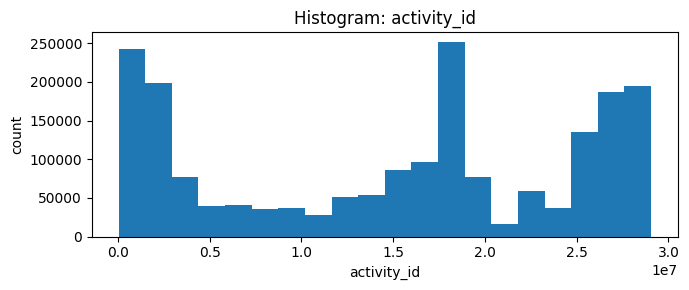


assay_chembl_id (dtype: int64)
Missing:  0 (0.00%)
Distinct: 179704 (9.26%)
Min 17
Max 2.597e+06


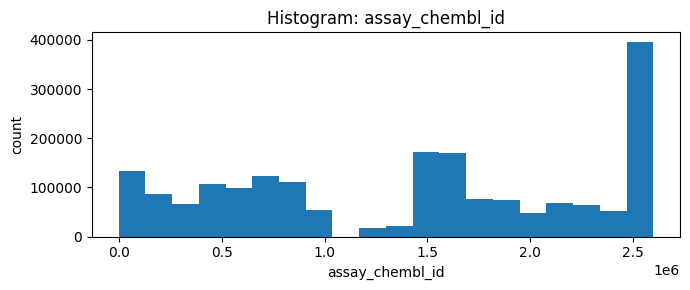


doc_id (dtype: int64)
Missing:  0 (0.00%)
Distinct: 47137 (2.43%)
Min 2
Max 1.359e+05


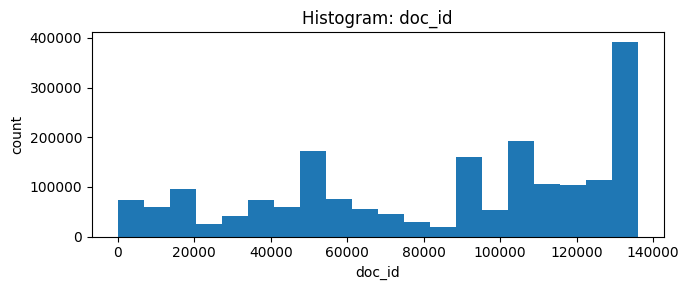


record_id (dtype: int64)
Missing:  0 (0.00%)
Distinct: 1105139 (56.92%)
Min 2
Max 4.648e+06


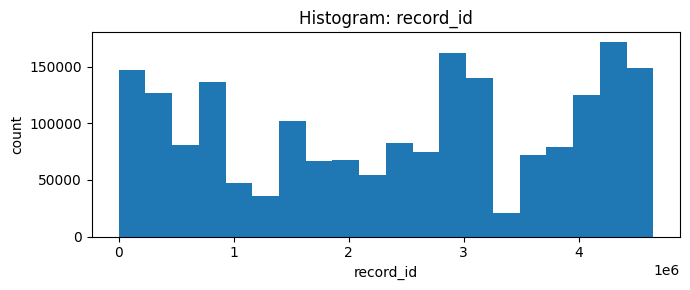


molregno (dtype: int64)
Missing:  0 (0.00%)
Distinct: 998425 (51.42%)
Min 10
Max 3.283e+06


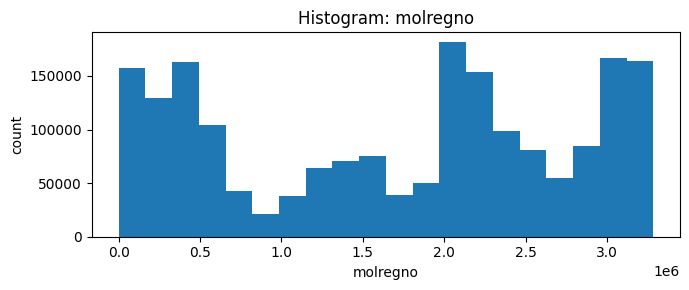


molecule_chembl_id (dtype: object)
Missing:  0 (0.00%)
Distinct: 998425 (51.42%)


,value,count,percent
0,CHEMBL388978,2177,0.11
1,CHEMBL5653589,1832,0.09
2,CHEMBL3752910,1312,0.07
3,CHEMBL535,682,0.04
4,CHEMBL1232461,650,0.03
5,CHEMBL98,571,0.03
6,CHEMBL603469,538,0.03
7,CHEMBL509032,509,0.03
8,CHEMBL1336,489,0.03
9,CHEMBL54,463,0.02



target_chembl_id (dtype: object)
Missing:  0 (0.00%)
Distinct: 8378 (0.43%)


,value,count,percent
0,CHEMBL203,18019,0.93
1,CHEMBL2971,14777,0.76
2,CHEMBL1741186,14691,0.76
3,CHEMBL1163125,14464,0.74
4,CHEMBL4822,13203,0.68
5,CHEMBL217,13049,0.67
6,CHEMBL279,12766,0.66
7,CHEMBL2835,11996,0.62
8,CHEMBL240,11956,0.62
9,CHEMBL5251,11895,0.61



standard_relation (dtype: object)
Missing:  0 (0.00%)
Distinct: 1 (0.00%)


,value,count,percent
0,=,1941528,100.0



standard_value (dtype: float64)
Missing:  0 (0.00%)
Distinct: 63666 (3.28%)
Min 0.00035
Max 1.4e+08


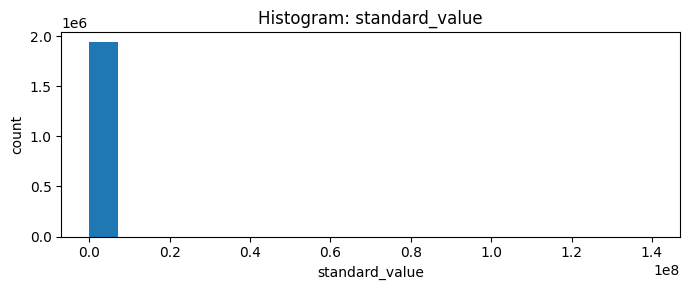


standard_units (dtype: object)
Missing:  0 (0.00%)
Distinct: 1 (0.00%)


,value,count,percent
0,nM,1941528,100.0



standard_flag (dtype: int64)
Missing:  0 (0.00%)
Distinct: 1 (0.00%)
Min 1
Max 1


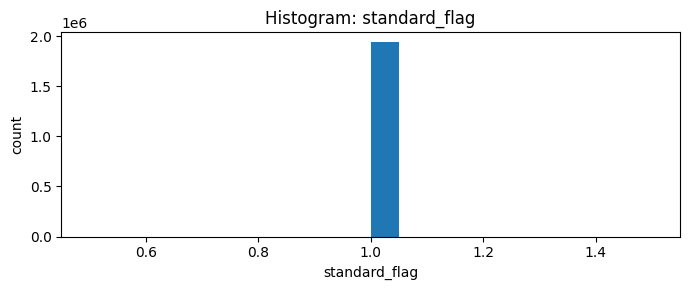


standard_type (dtype: object)
Missing:  0 (0.00%)
Distinct: 4 (0.00%)


,value,count,percent
0,IC50,1254272,64.6
1,Ki,455151,23.44
2,EC50,169608,8.74
3,Kd,62497,3.22



potential_duplicate (dtype: int64)
Missing:  0 (0.00%)
Distinct: 1 (0.00%)
Min 0
Max 0


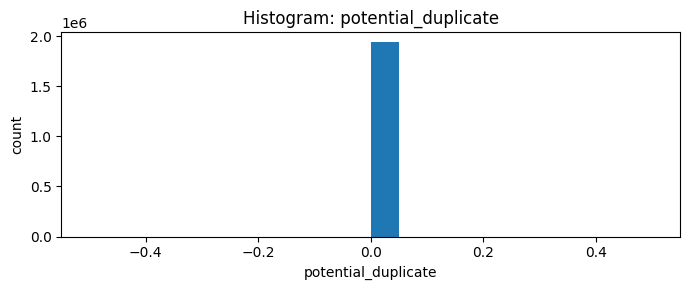


pchembl_value (dtype: float64)
Missing:  0 (0.00%)
Distinct: 896 (0.05%)
Min 0.85
Max 12.46


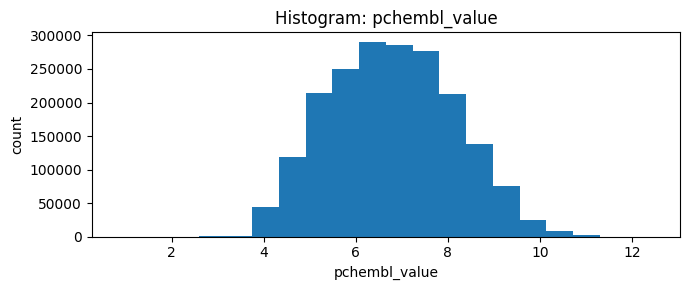


bao_endpoint (dtype: object)
Missing:  0 (0.00%)
Distinct: 4 (0.00%)


,value,count,percent
0,BAO_0000190,1254272,64.6
1,BAO_0000192,455151,23.44
2,BAO_0000188,169608,8.74
3,BAO_0000034,62497,3.22



uo_units (dtype: object)
Missing:  0 (0.00%)
Distinct: 1 (0.00%)


,value,count,percent
0,UO_0000065,1941528,100.0



qudt_units (dtype: object)
Missing:  0 (0.00%)
Distinct: 1 (0.00%)


,value,count,percent
0,http://www.openphacts.org/units/Nanomolar,1941528,100.0



toid (dtype: float64)
Missing:  1941499 (100.00%)
Distinct: 29 (0.00%)
Min 1.422e+04
Max 2.656e+04


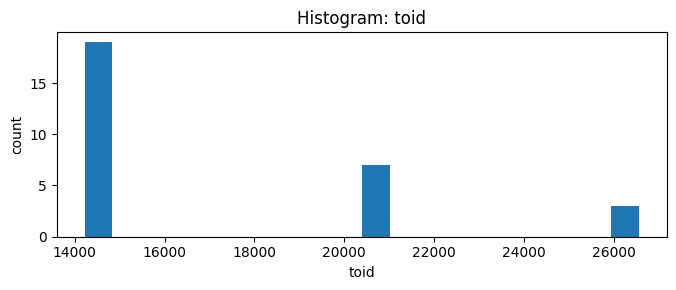


upper_value (dtype: float64)
Missing:  1930570 (99.44%)
Distinct: 1080 (0.06%)
Min 0.00032
Max 5e+04


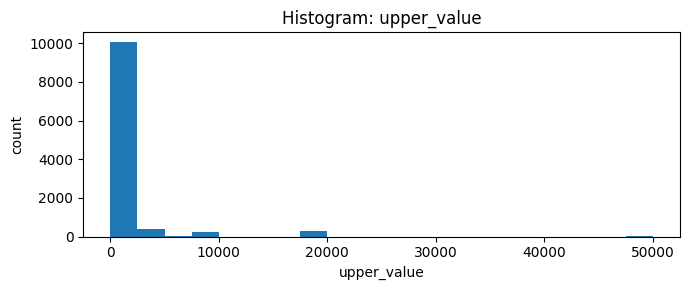


standard_upper_value (dtype: float64)
Missing:  1941528 (100.00%)
Distinct: 0 (0.00%)
No finite numeric values -> skipping histogram

src_id (dtype: int64)
Missing:  0 (0.00%)
Distinct: 22 (0.00%)
Min 1
Max 72


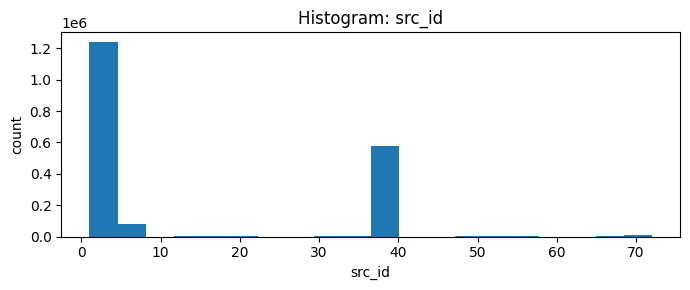


type (dtype: object)
Missing:  0 (0.00%)
Distinct: 57 (0.00%)


,value,count,percent
0,IC50,1198353,61.72
1,Ki,377690,19.45
2,EC50,152466,7.85
3,pKi,58805,3.03
4,Kd,46197,2.38
5,pIC50,44517,2.29
6,pEC50,14495,0.75
7,Log Ki,12787,0.66
8,pA2,5291,0.27
9,Kd apparent,4803,0.25



relation (dtype: object)
Missing:  0 (0.00%)
Distinct: 1 (0.00%)


,value,count,percent
0,=,1941528,100.0



value (dtype: float64)
Missing:  0 (0.00%)
Distinct: 71881 (3.70%)
Min -10.89
Max 2.6e+06


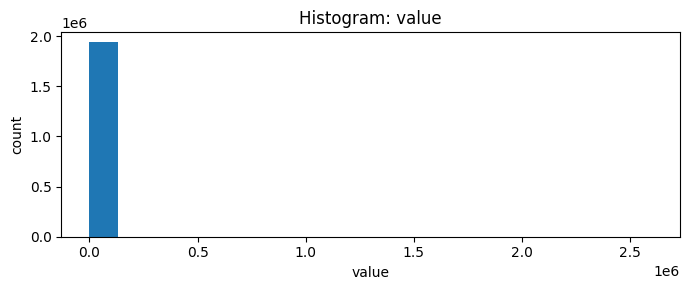


units (dtype: object)
Missing:  147166 (7.58%)
Distinct: 72 (0.00%)


,value,count,percent
0,nM,1217899,67.87
1,uM,543719,30.3
2,um,15841,0.88
3,M,5883,0.33
4,pM,1329,0.07
5,nmol/L,1249,0.07
6,umol/L,1162,0.06
7,mM,925,0.05
8,nm,809,0.05
9,10'-8M,604,0.03



text_value (dtype: float64)
Missing:  1941528 (100.00%)
Distinct: 0 (0.00%)
No finite numeric values -> skipping histogram

standard_text_value (dtype: float64)
Missing:  1941528 (100.00%)
Distinct: 0 (0.00%)
No finite numeric values -> skipping histogram

confidence_score (dtype: int64)
Missing:  0 (0.00%)
Distinct: 3 (0.00%)
Min 7
Max 9


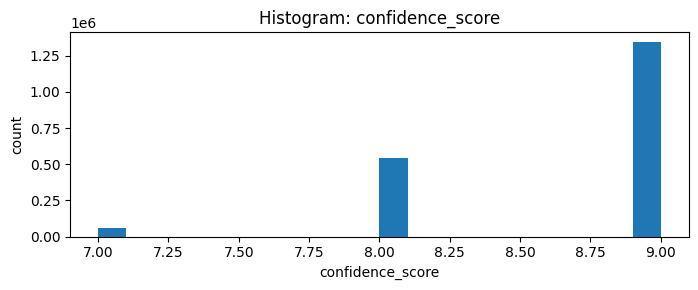


assay_type_description (dtype: category)
Missing:  0 (0.00%)
Distinct: 5 (0.00%)


,value,count,percent
0,Binding,1686852,86.88
1,Functional,224353,11.56
2,ADME,28479,1.47
3,Toxicity,1758,0.09
4,Unassigned,86,0.0



canonical_smiles (dtype: object)
Missing:  0 (0.00%)
Distinct: 998370 (51.42%)


,value,count,percent
0,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,2177,0.11
1,Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1Nc1nc(-c2cc...,1832,0.09
2,Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1Nc1nc(-c2cc...,1312,0.07
3,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...,682,0.04
4,CCNC(=O)C[C@@H]1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-...,650,0.03
5,O=C(CCCCCCC(=O)Nc1ccccc1)NO,571,0.03
6,C[C@]12O[C@H](C[C@]1(O)CO)n1c3ccccc3c3c4c(c5c6...,538,0.03
7,COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(N...,509,0.03
8,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,489,0.03
9,O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,463,0.02



mw_freebase (dtype: float64)
Missing:  0 (0.00%)
Distinct: 50984 (2.63%)
Min 19
Max 1000


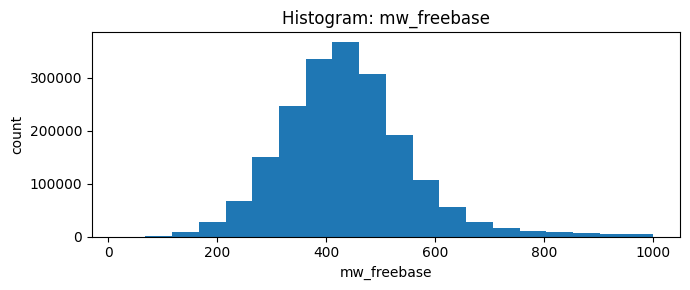


alogp (dtype: float64)
Missing:  0 (0.00%)
Distinct: 1975 (0.10%)
Min -12.92
Max 18.98


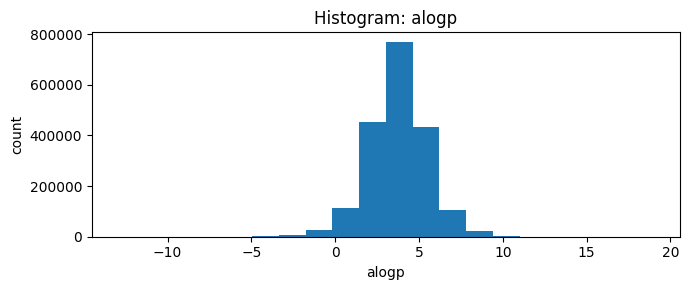


hbd (dtype: float64)
Missing:  0 (0.00%)
Distinct: 23 (0.00%)
Min 0
Max 25


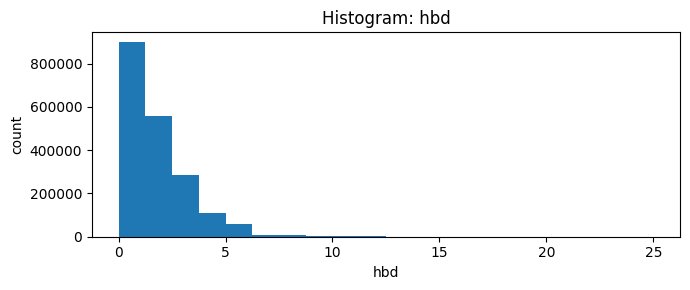


hba (dtype: float64)
Missing:  0 (0.00%)
Distinct: 32 (0.00%)
Min 0
Max 32


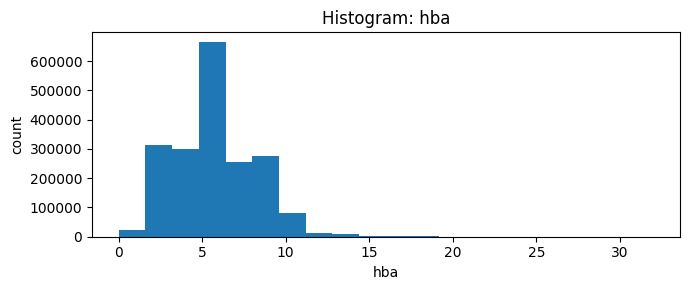


psa (dtype: float64)
Missing:  0 (0.00%)
Distinct: 21290 (1.10%)
Min 0
Max 580.2


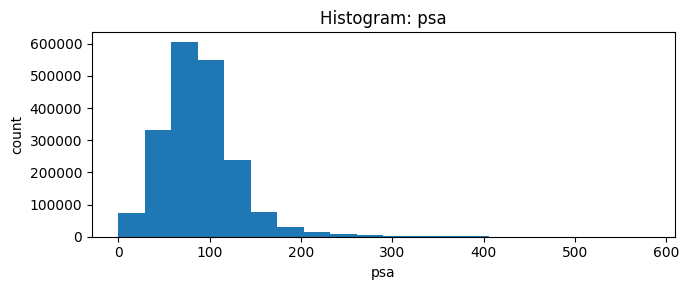


heavy_atoms (dtype: float64)
Missing:  0 (0.00%)
Distinct: 76 (0.00%)
Min 1
Max 79


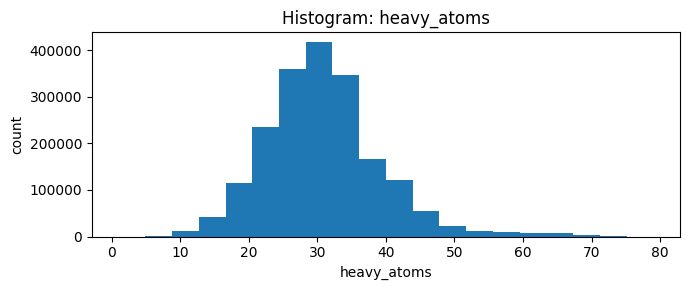


qed_weighted (dtype: float64)
Missing:  0 (0.00%)
Distinct: 95 (0.00%)
Min 0.01
Max 0.95


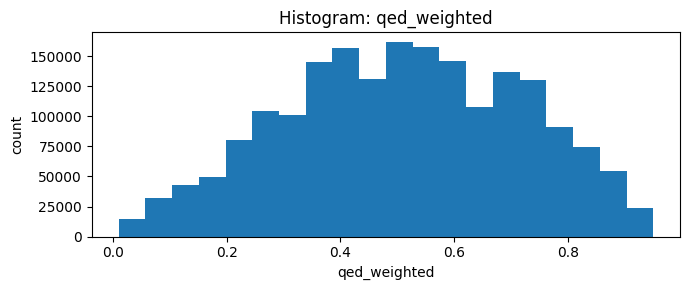


num_ro5_violations (dtype: float64)
Missing:  0 (0.00%)
Distinct: 5 (0.00%)
Min 0
Max 4


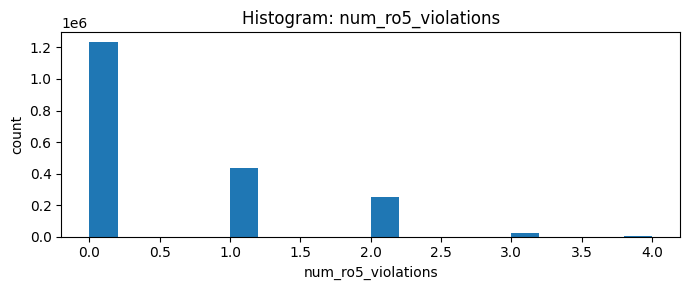


max_phase (dtype: category)
Missing:  0 (0.00%)
Distinct: 6 (0.00%)


,value,count,percent
0,0,1862276,95.92
1,4,41254,2.12
2,2,19806,1.02
3,3,10304,0.53
4,1,6603,0.34
5,-1,1285,0.07



first_approval (dtype: float64)
Missing:  1901066 (97.92%)
Distinct: 86 (0.00%)
Min 1934
Max 2024


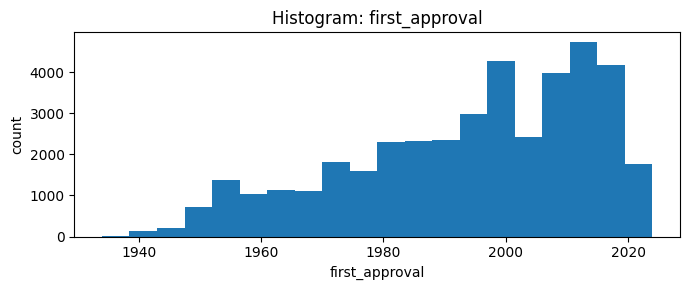


target_name (dtype: object)
Missing:  0 (0.00%)
Distinct: 6128 (0.32%)


,value,count,percent
0,D(2) dopamine receptor,18709,0.96
1,Epidermal growth factor receptor,18072,0.93
2,Acetylcholinesterase,16677,0.86
3,Mu-type opioid receptor,16261,0.84
4,Nuclear receptor ROR-gamma,15859,0.82
5,Tyrosine-protein kinase JAK2,14869,0.77
6,Bromodomain-containing protein 4,14472,0.75
7,Beta-secretase 1,13248,0.68
8,Vascular endothelial growth factor receptor 2,12893,0.66
9,5-hydroxytryptamine receptor 1A,12112,0.62



organism (dtype: object)
Missing:  0 (0.00%)
Distinct: 518 (0.03%)


,value,count,percent
0,Homo sapiens,1607493,82.8
1,Rattus norvegicus,119174,6.14
2,Mus musculus,43844,2.26
3,Human immunodeficiency virus 1,22286,1.15
4,Cavia porcellus,14441,0.74
5,Bos taurus,14147,0.73
6,Sus scrofa,6471,0.33
7,Electrophorus electricus,6464,0.33
8,Equus caballus,5670,0.29
9,Oryctolagus cuniculus,5341,0.28



target_type (dtype: object)
Missing:  0 (0.00%)
Distinct: 5 (0.00%)


,value,count,percent
0,SINGLE PROTEIN,1884854,97.08
1,PROTEIN COMPLEX,55159,2.84
2,CHIMERIC PROTEIN,1396,0.07
3,PROTEIN FAMILY,73,0.0
4,PROTEIN NUCLEIC-ACID COMPLEX,46,0.0



MolWt (dtype: float64)
Missing:  0 (0.00%)
Distinct: 367410 (18.92%)
Min 19
Max 1514


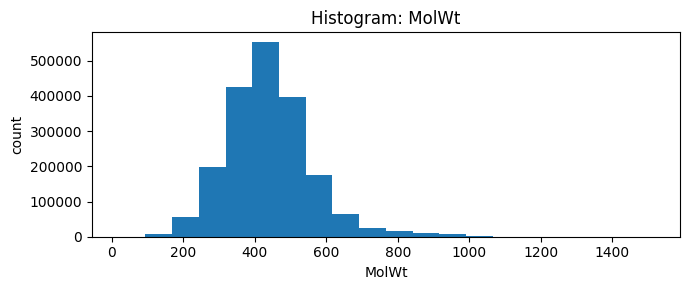


LogP (dtype: float64)
Missing:  0 (0.00%)
Distinct: 431628 (22.23%)
Min -33.49
Max 18.98


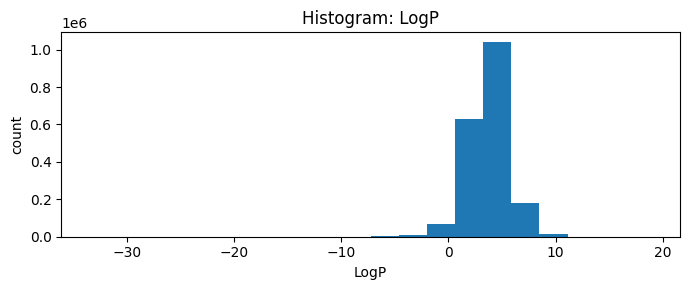


TPSA (dtype: float64)
Missing:  0 (0.00%)
Distinct: 43786 (2.26%)
Min 0
Max 580.2


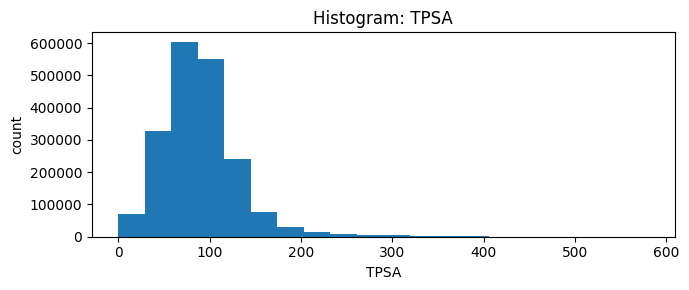


RotatableBonds (dtype: int64)
Missing:  0 (0.00%)
Distinct: 49 (0.00%)
Min 0
Max 50


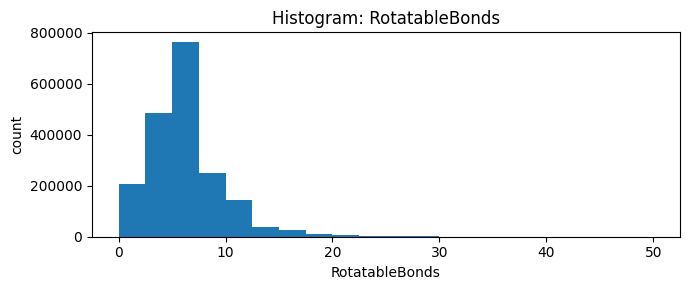


AromaticRings (dtype: int64)
Missing:  0 (0.00%)
Distinct: 18 (0.00%)
Min 0
Max 30


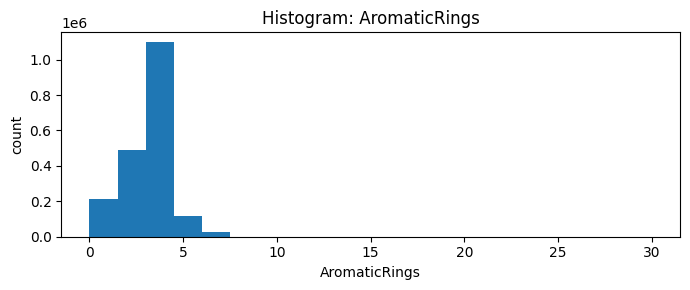


FractionCSP3 (dtype: float64)
Missing:  0 (0.00%)
Distinct: 916 (0.05%)
Min 0
Max 1


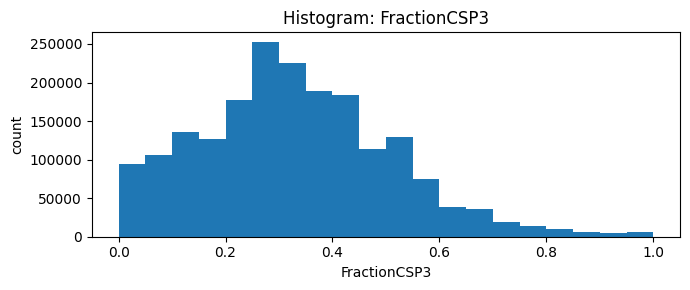

In [19]:
cols = df.columns

for c in cols:
    s = df[c]
    print_histogram(c, s)


log10_standard_value (dtype: float64)
Missing:  0 (0.00%)
Distinct: 63666 (3.28%)
Min -3.456
Max 8.146


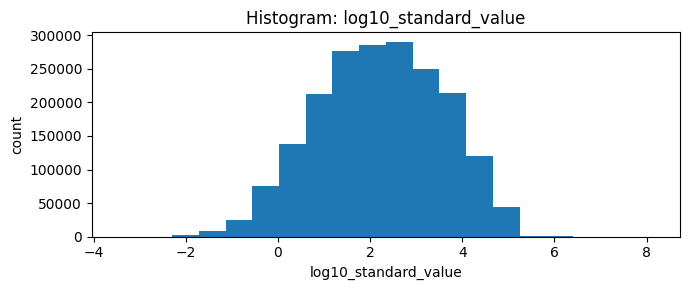


log10_MolWt (dtype: float64)
Missing:  0 (0.00%)
Distinct: 218122 (11.23%)
Min 1.279
Max 3.18


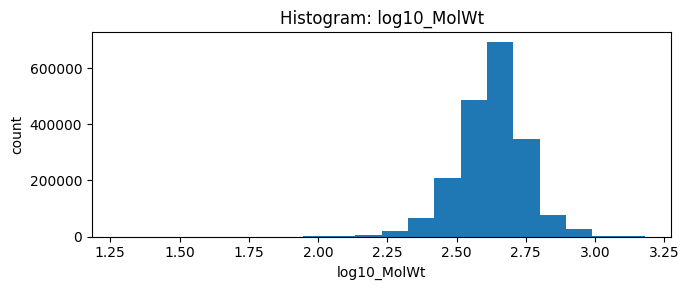


log10_LogP (dtype: float64)
Missing:  49848 (2.57%)
Distinct: 381572 (19.65%)
Min -14.81
Max 1.278


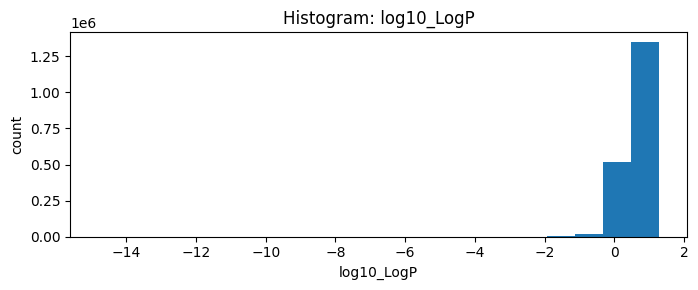


log10_TPSA (dtype: float64)
Missing:  685 (0.04%)
Distinct: 26143 (1.35%)
Min 0.4786
Max 2.764


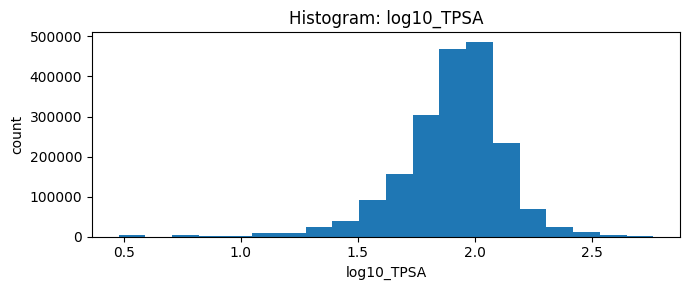


log10_RotatableBonds (dtype: float64)
Missing:  23323 (1.20%)
Distinct: 48 (0.00%)
Min 0
Max 1.699


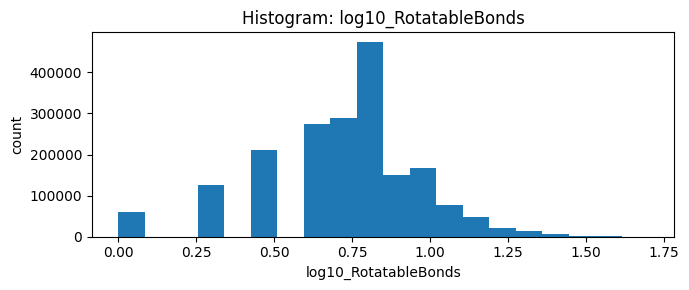


log10_AromaticRings (dtype: float64)
Missing:  42785 (2.20%)
Distinct: 17 (0.00%)
Min 0
Max 1.477


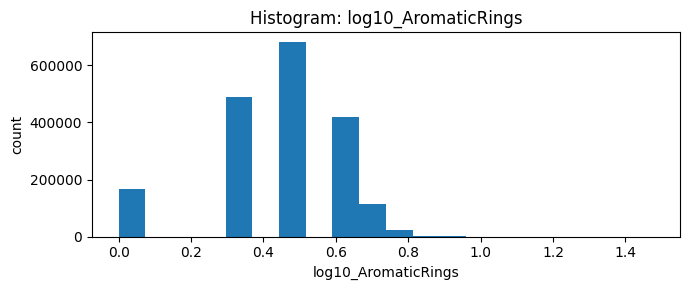


log10_FractionCSP3 (dtype: float64)
Missing:  67878 (3.50%)
Distinct: 915 (0.05%)
Min -1.633
Max 0


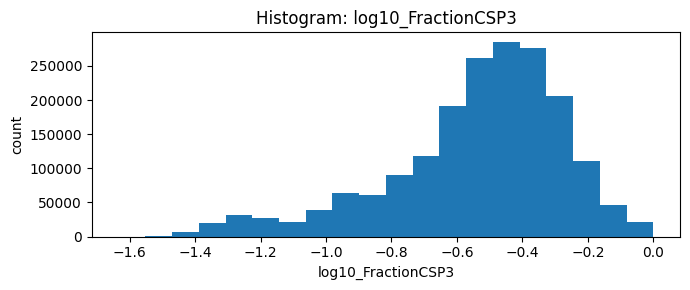


log10_alogp (dtype: float64)
Missing:  44869 (2.31%)
Distinct: 1295 (0.07%)
Min -2
Max 1.278


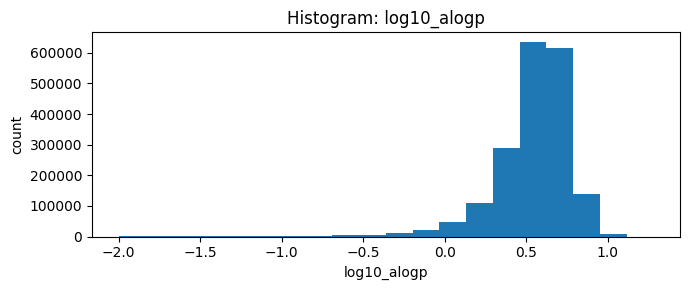


log10_hbd (dtype: float64)
Missing:  265084 (13.65%)
Distinct: 22 (0.00%)
Min 0
Max 1.398


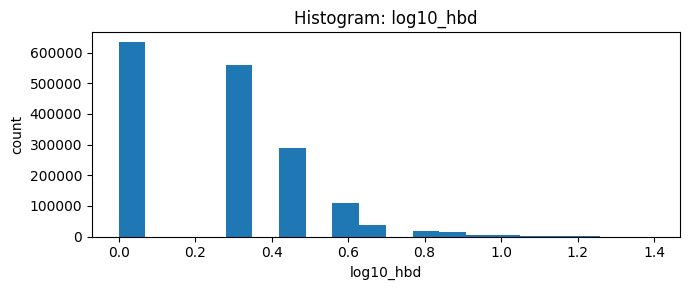


log10_hba (dtype: float64)
Missing:  1510 (0.08%)
Distinct: 31 (0.00%)
Min 0
Max 1.505


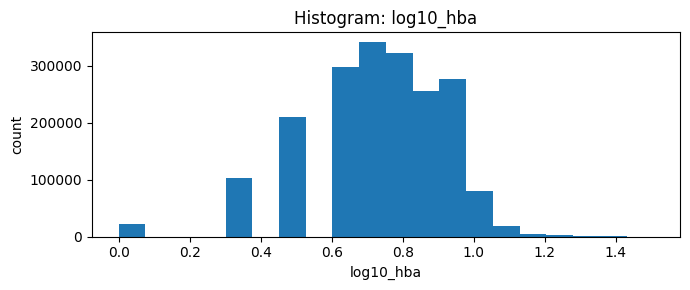

In [20]:
log10_specs = [
    ("log10_standard_value", "standard_value"),
    ("log10_MolWt", "MolWt"),
    ("log10_LogP", "LogP"),
    ("log10_TPSA", "TPSA"),
    ("log10_RotatableBonds", "RotatableBonds"),
    ("log10_AromaticRings", "AromaticRings"),
    ("log10_FractionCSP3", "FractionCSP3"),
    ("log10_alogp", "alogp"),
    ("log10_hbd", "hbd"),
    ("log10_hba", "hba")
]

for new_col, src_col in log10_specs:
    s = np.log10(df[src_col].where(df[src_col] > 0))
    print_histogram(new_col, s)

In [21]:
def print_boxplot(df, pairs):
    for y, x in pairs:
        if y not in df.columns or x not in df.columns:
            continue

        d = df
        if x == "target_name":
            d = df[df[x].isin(df[x].value_counts().head(15).index)]

        plt.figure(figsize=(12,4))
        d.boxplot(column=y, by=x, rot=30)
        plt.title(f"{y} vs {x}")
        plt.suptitle("")
        plt.tight_layout()
        plt.show()

In [22]:
df.target_type = df.target_type == 'SINGLE PROTEIN'

<Figure size 1200x400 with 0 Axes>

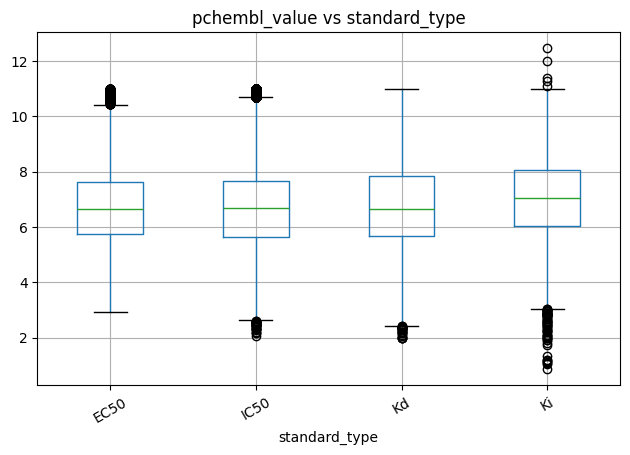

<Figure size 1200x400 with 0 Axes>

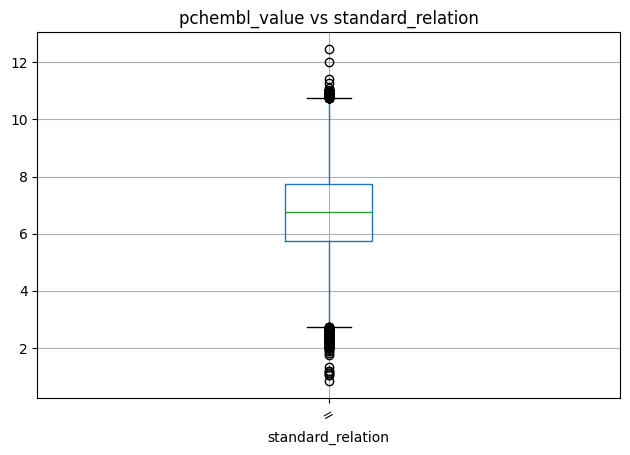

In [23]:
pairs = [
        ("pchembl_value", "standard_type"),
        ("pchembl_value", "standard_relation"),
    ]

print_boxplot(df, pairs)

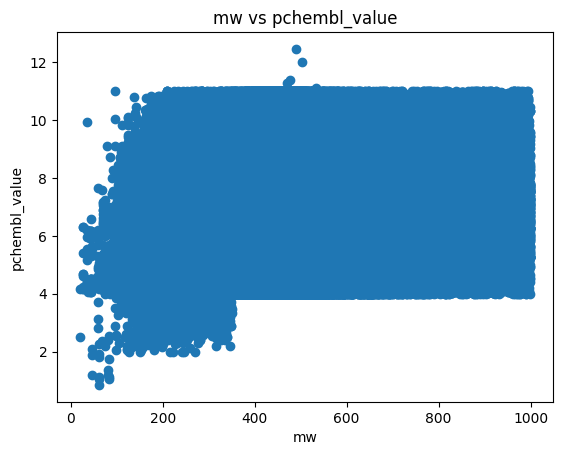

In [24]:
plt.scatter(df["mw_freebase"], df["pchembl_value"], alpha=1)
plt.title("mw vs pchembl_value")
plt.xlabel("mw")
plt.ylabel("pchembl_value")
plt.show()

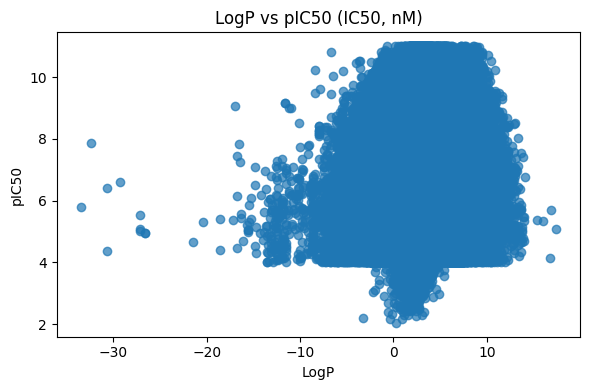

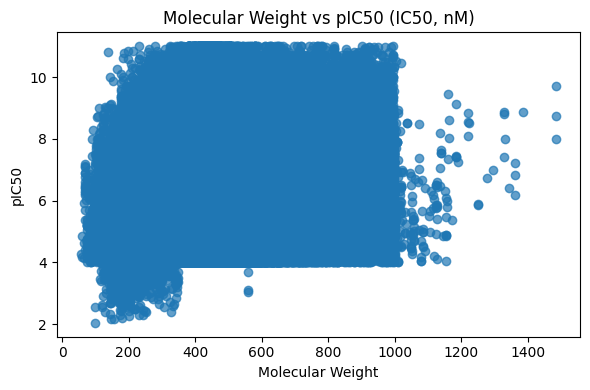

In [25]:
mask = (
    (df["standard_type"].astype(str).str.upper() == "IC50") &
    (df["standard_units"].astype(str).str.lower() == "nm") &
    (df["standard_value"] > 0)
)

d = df.loc[mask].copy()

# pIC50 = -log10(IC50 [M]); IC50 w nM -> *1e-9
d["pIC50"] = -np.log10(d["standard_value"] * 1e-9)

# LogP vs pIC50
if "LogP" in d.columns:
    plt.figure(figsize=(6,4))
    plt.scatter(d["LogP"], d["pIC50"], alpha=0.7)
    plt.xlabel("LogP")
    plt.ylabel("pIC50")
    plt.title("LogP vs pIC50 (IC50, nM)")
    plt.tight_layout()
    plt.show()

# MolWt vs pIC50
if "MolWt" in d.columns:
    plt.figure(figsize=(6,4))
    plt.scatter(d["MolWt"], d["pIC50"], alpha=0.7)
    plt.xlabel("Molecular Weight")
    plt.ylabel("pIC50")
    plt.title("Molecular Weight vs pIC50 (IC50, nM)")
    plt.tight_layout()
    plt.show()

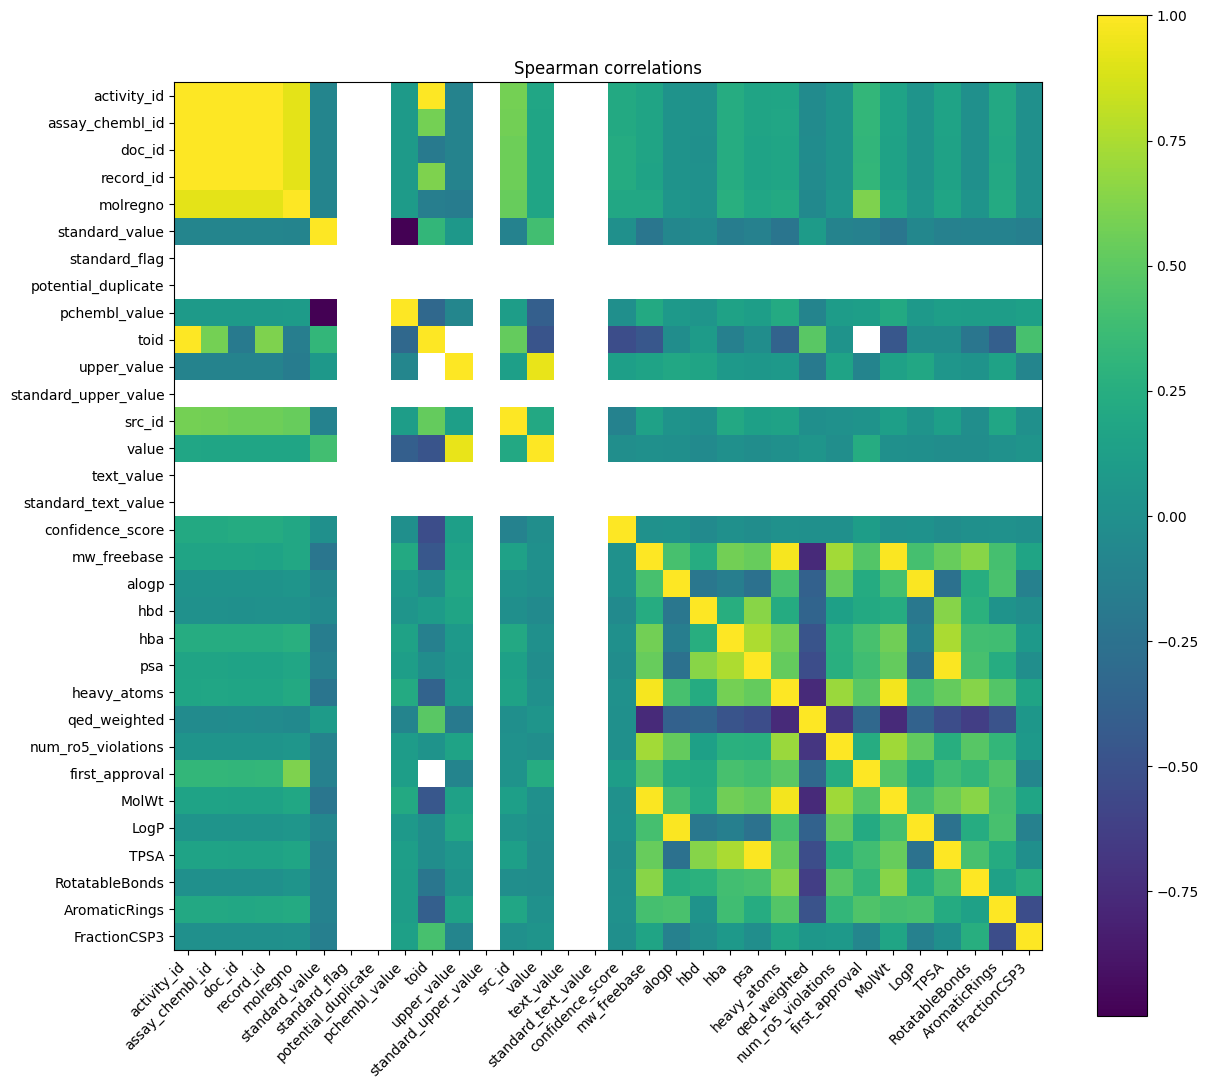

In [28]:
def print_correlation(df):
    cor_cols = df.select_dtypes(include=[np.number]).columns

    corr = df[cor_cols].corr(method="spearman")
    
    plt.figure(figsize=(14, 13))
    plt.imshow(corr, interpolation="nearest")
    plt.colorbar()
    plt.xticks(range(len(cor_cols)), cor_cols, rotation=45, ha="right")
    plt.yticks(range(len(cor_cols)), cor_cols)
    plt.title("Spearman correlations")
    plt.show()

print_correlation(df)

In [29]:
df.to_parquet(
    "df_after_eda_before_fe.parquet",
    engine="pyarrow",
    compression="snappy",
    index=False
)

# Feature engineering

In [30]:
drop_cols = [
    'activity_id',
    'assay_chembl_id',
    'doc_id',
    'molecule_chembl_id',
    'record_id',
    'molregno',
    'src_id',
    'standard_flag',
    'target_type',
    'potential_duplicate',
    'uo_units',
    'qudt_units',
    'toid',
    'upper_value',
    'standard_upper_value',
    'value',
    'units',
    'text_value',
    'type',
    'standard_text_value',
    'canonical_smiles'
]

for col in drop_cols:
    if col in df.columns:
        df = df.drop(columns=col)

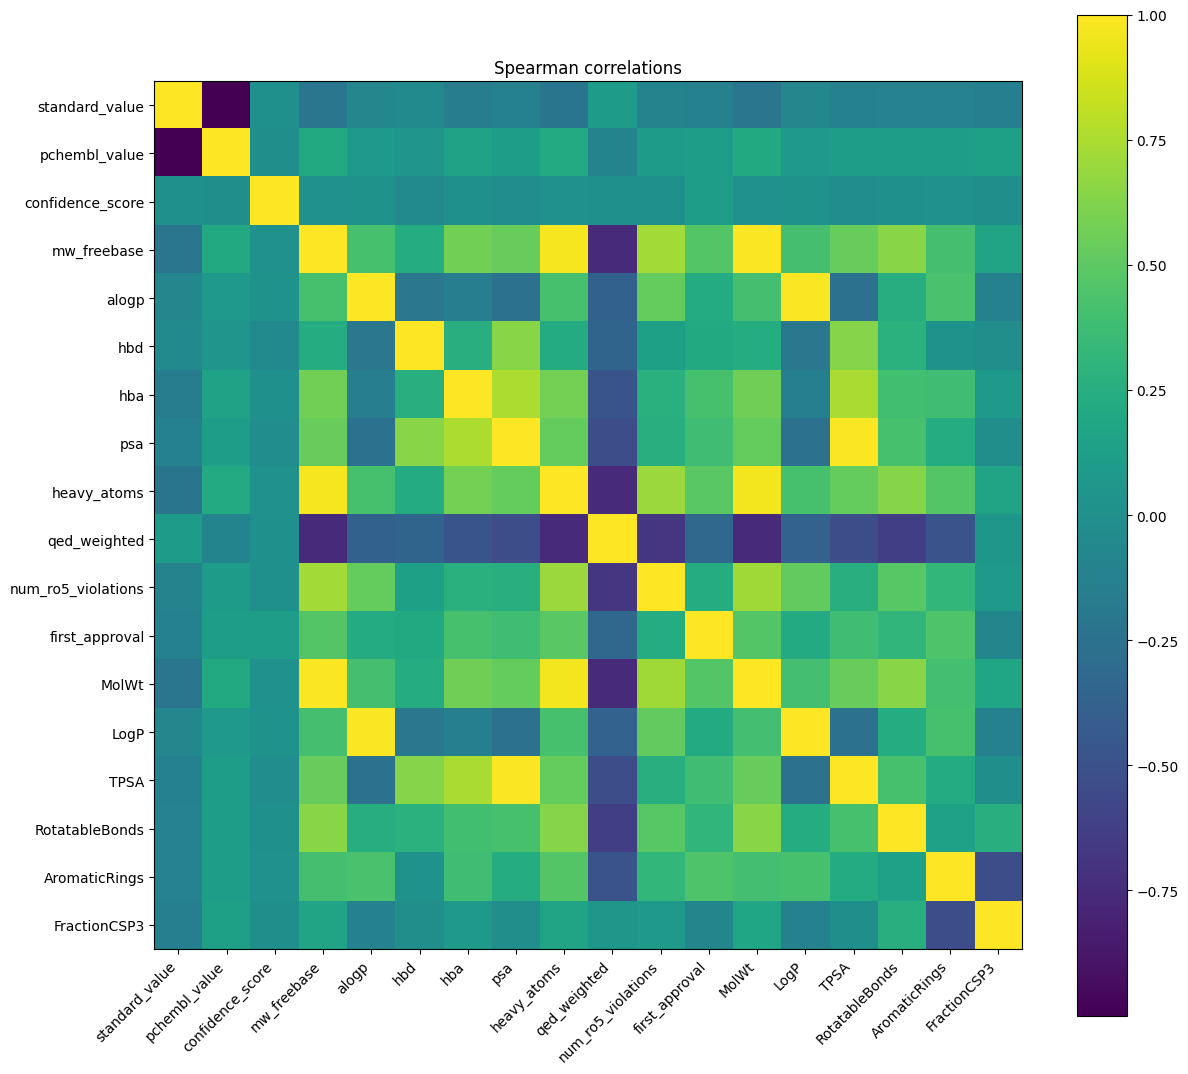

In [31]:
print_correlation(df)

In [32]:
def clip_extremes(series, q_low=0.005, q_high=0.995):
    print("Before removing extremes:")
    display(series.describe())

    clipped = series.clip(
        lower=series.quantile(q_low),
        upper=series.quantile(q_high)
    )

    print("After removing extremes:")
    display(clipped.describe())

    return clipped

In [33]:
df.hbd = clip_extremes(df.hbd, 0.0, 0.995)

Before removing extremes:


count    1.941528e+06
mean     1.860404e+00
std      1.526044e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      2.500000e+01
Name: hbd, dtype: float64

After removing extremes:


count    1.941528e+06
mean     1.849044e+00
std      1.457436e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: hbd, dtype: float64

In [34]:
df.hba = clip_extremes(df.hba, 0.0, 0.995)

Before removing extremes:


count    1.941528e+06
mean     5.668024e+00
std      2.333862e+00
min      0.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      7.000000e+00
max      3.200000e+01
Name: hba, dtype: float64

After removing extremes:


count    1.941528e+06
mean     5.653275e+00
std      2.269313e+00
min      0.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      7.000000e+00
max      1.300000e+01
Name: hba, dtype: float64

In [35]:
df.MolWt = clip_extremes(df.MolWt)

Before removing extremes:


count    1.941528e+06
mean     4.391232e+02
std      1.207389e+02
min      1.899800e+01
25%      3.614860e+02
50%      4.309400e+02
75%      5.025350e+02
max      1.514310e+03
Name: MolWt, dtype: float64

After removing extremes:


count    1.941528e+06
mean     4.389363e+02
std      1.189517e+02
min      1.712430e+02
25%      3.614860e+02
50%      4.309400e+02
75%      5.025350e+02
max      9.110240e+02
Name: MolWt, dtype: float64

In [36]:
df.LogP = clip_extremes(df.LogP)

Before removing extremes:


count    1.941528e+06
mean     3.732097e+00
std      1.805325e+00
min     -3.348920e+01
25%      2.714630e+00
50%      3.764500e+00
75%      4.822800e+00
max      1.897920e+01
Name: LogP, dtype: float64

After removing extremes:


count    1.941528e+06
mean     3.736914e+00
std      1.747099e+00
min     -2.341500e+00
25%      2.714630e+00
50%      3.764500e+00
75%      4.822800e+00
max      8.700820e+00
Name: LogP, dtype: float64

In [37]:
df.TPSA = clip_extremes(df.TPSA, 0.0, 0.995)

Before removing extremes:


count    1.941528e+06
mean     8.998570e+01
std      4.333438e+01
min      0.000000e+00
25%      6.280000e+01
50%      8.561000e+01
75%      1.095800e+02
max      5.802200e+02
Name: TPSA, dtype: float64

After removing extremes:


count    1.941528e+06
mean     8.972448e+01
std      4.181394e+01
min      0.000000e+00
25%      6.280000e+01
50%      8.561000e+01
75%      1.095800e+02
max      2.917400e+02
Name: TPSA, dtype: float64

In [38]:
df.RotatableBonds = clip_extremes(df.RotatableBonds, 0.0, 0.995)

Before removing extremes:


count    1.941528e+06
mean     6.021447e+00
std      3.538750e+00
min      0.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      7.000000e+00
max      5.000000e+01
Name: RotatableBonds, dtype: float64

After removing extremes:


count    1.941528e+06
mean     6.001988e+00
std      3.429014e+00
min      0.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      7.000000e+00
max      2.200000e+01
Name: RotatableBonds, dtype: float64

In [39]:

drop_cols = [
    'heavy_atoms',
    'psa',
    'standard_value',
    'mw_freebase',
    'alogp'
]

for col in drop_cols:
    if col in df.columns:
        df = df.drop(columns=col)

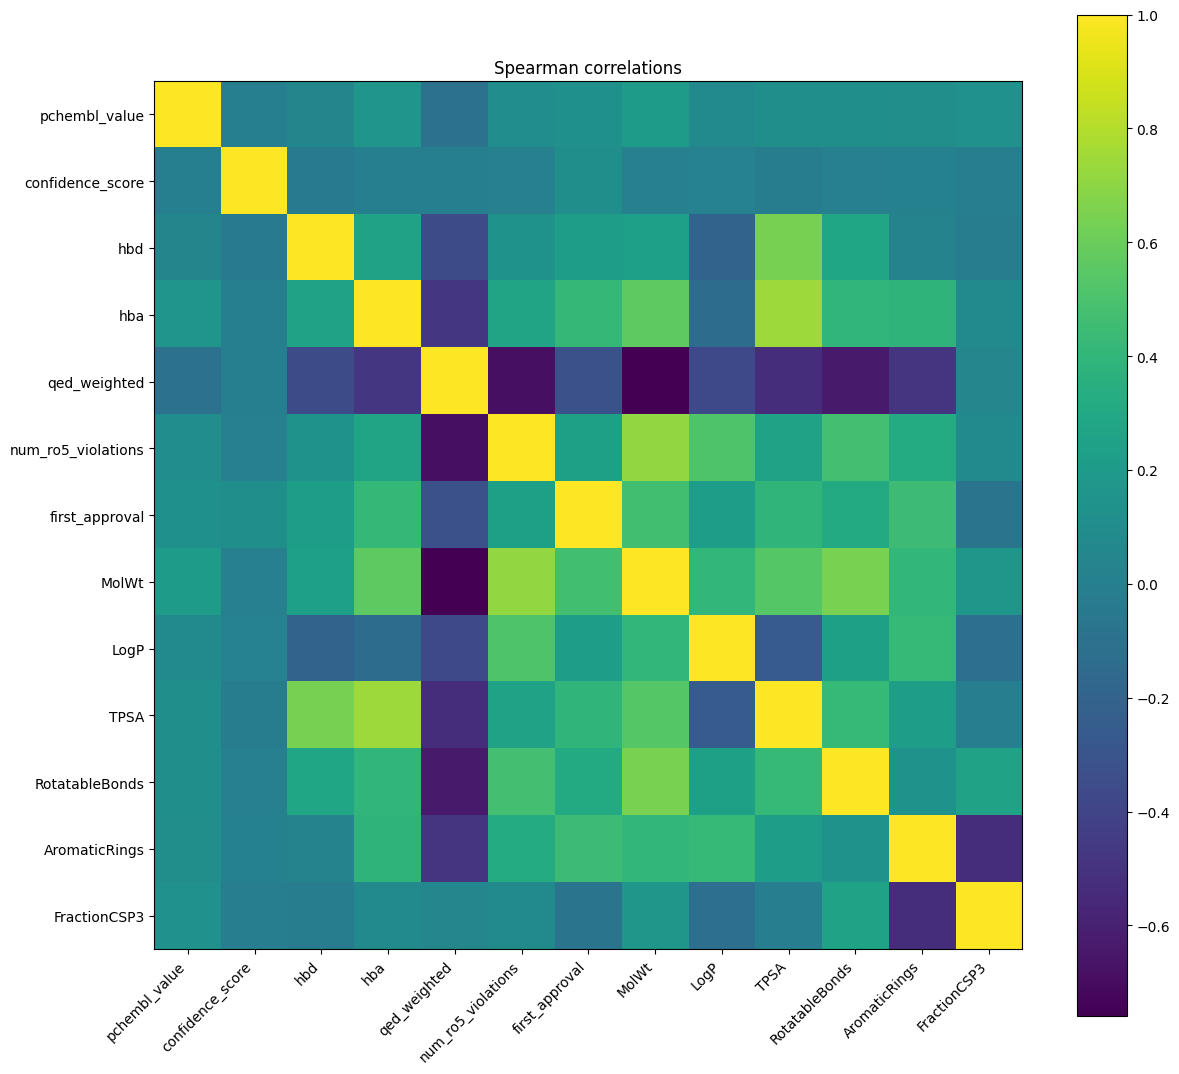

In [40]:
print_correlation(df)

In [41]:
display(df.describe())

,pchembl_value,confidence_score,hbd,hba,qed_weighted,num_ro5_violations,first_approval,MolWt,LogP,TPSA,RotatableBonds,AromaticRings,FractionCSP3
count,1.941528e+06,1.941528e+06,1.941528e+06,1.941528e+06,1.941528e+06,1.941528e+06,40462.000000,1.941528e+06,1.941528e+06,1.941528e+06,1.941528e+06,1.941528e+06,1.941528e+06
mean,6.780152e+00,8.663099e+00,1.849044e+00,5.653275e+00,5.099859e-01,5.183031e-01,1993.918887,4.389363e+02,3.736914e+00,8.972448e+01,6.001988e+00,2.884817e+00,3.281043e-01
std,1.350348e+00,5.308291e-01,1.457436e+00,2.269313e+00,2.072344e-01,7.644536e-01,19.835214,1.189517e+02,1.747099e+00,4.181394e+01,3.429014e+00,1.172518e+00,1.805254e-01
min,8.500000e-01,7.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,1934.000000,1.712430e+02,-2.341500e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.750000e+00,8.000000e+00,1.000000e+00,4.000000e+00,3.600000e-01,0.000000e+00,1981.000000,3.614860e+02,2.714630e+00,6.280000e+01,4.000000e+00,2.000000e+00,2.000000e-01
50%,6.760000e+00,9.000000e+00,2.000000e+00,5.000000e+00,5.100000e-01,0.000000e+00,1998.000000,4.309400e+02,3.764500e+00,8.561000e+01,5.000000e+00,3.000000e+00,3.200000e-01
75%,7.750000e+00,9.000000e+00,2.000000e+00,7.000000e+00,6.700000e-01,1.000000e+00,2011.000000,5.025350e+02,4.822800e+00,1.095800e+02,7.000000e+00,4.000000e+00,4.375000e-01
max,1.246000e+01,9.000000e+00,9.000000e+00,1.300000e+01,9.500000e-01,4.000000e+00,2024.000000,9.110240e+02,8.700820e+00,2.917400e+02,2.200000e+01,3.000000e+01,1.000000e+00


<Figure size 1200x400 with 0 Axes>

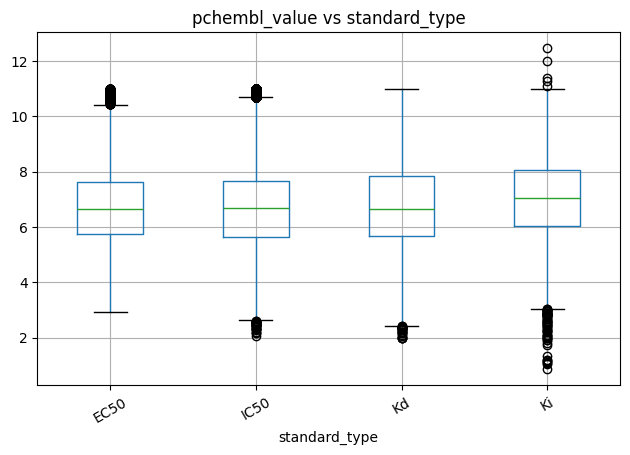

<Figure size 1200x400 with 0 Axes>

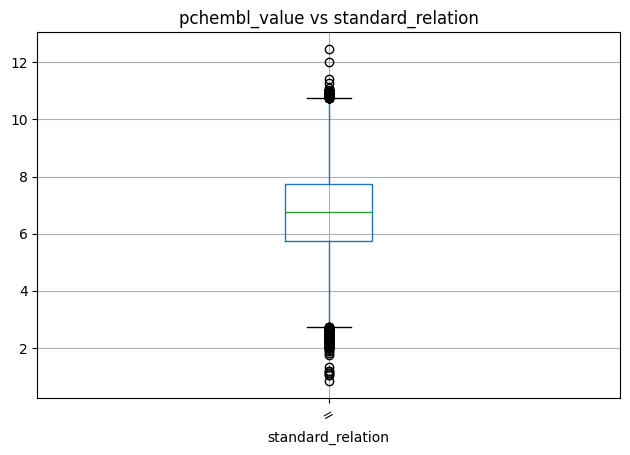

In [42]:
pairs = [
        ("pchembl_value", "standard_type"),
        ("pchembl_value", "standard_relation"),
    ]

print_boxplot(df, pairs)

In [43]:
print('Before removing outliers:')
display(df.describe())

q_low = 0.01
q_high = 0.99

y = 'pchembl_value'
g = 'standard_type'

m = df[y].notna() & df[g].notna()

sub = df.loc[m, [g, y]]
q = sub.groupby(g)[y].quantile([q_low, q_high]).unstack()
lo = sub[g].map(q[q_low])
hi = sub[g].map(q[q_high])

df = df.loc[sub.index[sub[y].between(lo, hi)]]

print('After removing outliers:')
display(df.describe())
    

Before removing outliers:


,pchembl_value,confidence_score,hbd,hba,qed_weighted,num_ro5_violations,first_approval,MolWt,LogP,TPSA,RotatableBonds,AromaticRings,FractionCSP3
count,1.941528e+06,1.941528e+06,1.941528e+06,1.941528e+06,1.941528e+06,1.941528e+06,40462.000000,1.941528e+06,1.941528e+06,1.941528e+06,1.941528e+06,1.941528e+06,1.941528e+06
mean,6.780152e+00,8.663099e+00,1.849044e+00,5.653275e+00,5.099859e-01,5.183031e-01,1993.918887,4.389363e+02,3.736914e+00,8.972448e+01,6.001988e+00,2.884817e+00,3.281043e-01
std,1.350348e+00,5.308291e-01,1.457436e+00,2.269313e+00,2.072344e-01,7.644536e-01,19.835214,1.189517e+02,1.747099e+00,4.181394e+01,3.429014e+00,1.172518e+00,1.805254e-01
min,8.500000e-01,7.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,1934.000000,1.712430e+02,-2.341500e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.750000e+00,8.000000e+00,1.000000e+00,4.000000e+00,3.600000e-01,0.000000e+00,1981.000000,3.614860e+02,2.714630e+00,6.280000e+01,4.000000e+00,2.000000e+00,2.000000e-01
50%,6.760000e+00,9.000000e+00,2.000000e+00,5.000000e+00,5.100000e-01,0.000000e+00,1998.000000,4.309400e+02,3.764500e+00,8.561000e+01,5.000000e+00,3.000000e+00,3.200000e-01
75%,7.750000e+00,9.000000e+00,2.000000e+00,7.000000e+00,6.700000e-01,1.000000e+00,2011.000000,5.025350e+02,4.822800e+00,1.095800e+02,7.000000e+00,4.000000e+00,4.375000e-01
max,1.246000e+01,9.000000e+00,9.000000e+00,1.300000e+01,9.500000e-01,4.000000e+00,2024.000000,9.110240e+02,8.700820e+00,2.917400e+02,2.200000e+01,3.000000e+01,1.000000e+00


After removing outliers:


,pchembl_value,confidence_score,hbd,hba,qed_weighted,num_ro5_violations,first_approval,MolWt,LogP,TPSA,RotatableBonds,AromaticRings,FractionCSP3
count,1.903349e+06,1.903349e+06,1.903349e+06,1.903349e+06,1.903349e+06,1.903349e+06,39424.000000,1.903349e+06,1.903349e+06,1.903349e+06,1.903349e+06,1.903349e+06,1.903349e+06
mean,6.773392e+00,8.663955e+00,1.842708e+00,5.650855e+00,5.103304e-01,5.174348e-01,1993.963043,4.389493e+02,3.744144e+00,8.956172e+01,6.001040e+00,2.888132e+00,3.279551e-01
std,1.289882e+00,5.303500e-01,1.453071e+00,2.263353e+00,2.069522e-01,7.627681e-01,19.822578,1.180112e+02,1.738980e+00,4.163444e+01,3.419238e+00,1.170237e+00,1.802142e-01
min,4.010000e+00,7.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,1934.000000,1.712430e+02,-2.341500e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.770000e+00,8.000000e+00,1.000000e+00,4.000000e+00,3.600000e-01,0.000000e+00,1981.000000,3.623800e+02,2.725800e+00,6.275000e+01,4.000000e+00,2.000000e+00,2.000000e-01
50%,6.760000e+00,9.000000e+00,2.000000e+00,5.000000e+00,5.100000e-01,0.000000e+00,1998.000000,4.313150e+02,3.770540e+00,8.552000e+01,5.000000e+00,3.000000e+00,3.181818e-01
75%,7.720000e+00,9.000000e+00,2.000000e+00,7.000000e+00,6.700000e-01,1.000000e+00,2011.000000,5.023920e+02,4.825600e+00,1.093800e+02,7.000000e+00,4.000000e+00,4.375000e-01
max,1.020000e+01,9.000000e+00,9.000000e+00,1.300000e+01,9.500000e-01,4.000000e+00,2024.000000,9.110240e+02,8.700820e+00,2.917400e+02,2.200000e+01,3.000000e+01,1.000000e+00


<Figure size 1200x400 with 0 Axes>

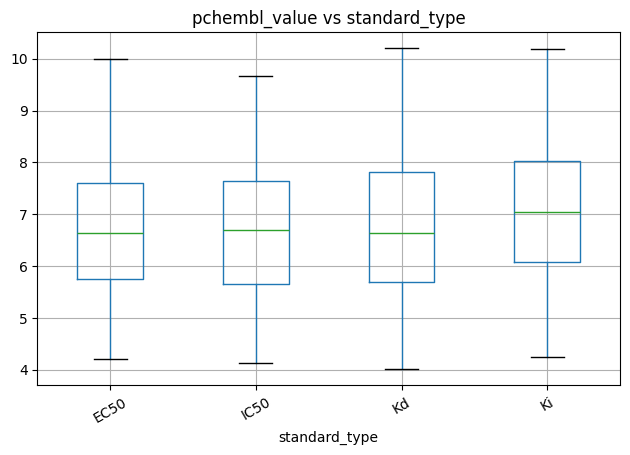

<Figure size 1200x400 with 0 Axes>

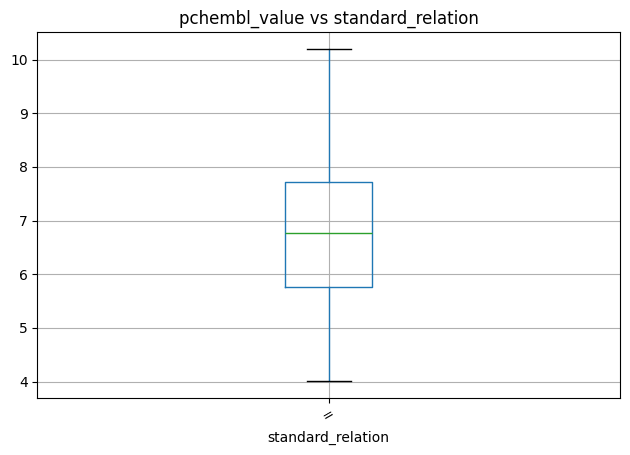

In [44]:
pairs = [
        ("pchembl_value", "standard_type"),
        ("pchembl_value", "standard_relation"),
    ]
print_boxplot(df, pairs)

In [45]:
df.to_parquet(
    "chembl_ml_dataset_03.parquet",
    engine="pyarrow",
    compression="snappy",
    index=False
)